
## load data

In [30]:
import sys
import pandas as pd
sys.path.append('/Users/shinbo/PycharmProjects/paper/LDA')

def print_top_words(lam, feature_names, n_top_words):
    for topic_id, topic in enumerate(lam):
        print('\nTopic Nr.%d:' % int(topic_id + 1))
        print(''.join([feature_names[i] + ' ' + str(round(topic[i], 2))
                       + ' | ' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
def TOP_N_WORDS_df(MODEL, TOP_N_WORDS, col_names):
    DMM_LDA_Top_words = pd.DataFrame()
    for i in range(4):
        temp = pd.DataFrame({'words':cv.get_feature_names(), 'lambda':MODEL.components_[i,:]})
        temp = temp.sort_values(by='lambda', ascending=False).iloc[:TOP_N_WORDS,:]
        DMM_LDA_Top_words[i] = temp['words'].tolist()
    DMM_LDA_Top_words.columns = col_names
    return DMM_LDA_Top_words

In [31]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

dir_ = '/Users/shinbo/Desktop/metting/LDA/paper/experiments/car/prepare/preproc.pkl'
data = pickle.load(open(dir_, 'rb'))
stop_words = ['the','and','to','it','be','have','in','for','of','this','that']
for i in range(len(data)):
    data[i] = [w for w in data[i] if w not in stop_words]

data_join = [' '.join(doc) for doc in data]
cv = CountVectorizer()
X = cv.fit_transform(data_join).toarray()

## DMM-LDA Result

In [32]:
dir_model = '/Users/shinbo/Desktop/metting/LDA/paper/experiments/car/model/DMM_result.pkl'
DMM_LDA = pickle.load(open(dir_model,'rb'))
TOP_N_WORDS = 100
DMM_LDA_Top_words = TOP_N_WORDS_df(DMM_LDA, TOP_N_WORDS, [f'Topic {i}' for i in range(1,5)])

DMM_LDA_lam =  [DMM_LDA.components_[k,:] for k in range(4)]
print_top_words(DMM_LDA_lam, list(cv.get_feature_names()), 20)


Topic Nr.1:
car 7322.76 | great 4526.08 | love 3900.49 | good 3640.23 | drive 3420.85 | vehicle 2644.53 | get 2480.67 | well 2165.74 | gas 2113.73 | look 1912.93 | mileage 1892.02 | comfortable 1818.07 | ride 1766.79 | hyundai 1705.93 | like 1563.34 | one 1482.46 | feature 1453.09 | buy 1377.13 | new 1352.95 | truck 1199.15 | 

Topic Nr.2:
car 3727.79 | drive 2727.61 | love 2298.13 | vehicle 1937.69 | great 1787.52 | seat 1703.31 | like 1294.77 | get 1261.66 | well 1063.21 | comfortable 1017.82 | hyundai 1002.26 | good 994.92 | back 925.02 | look 915.15 | one 772.24 | use 745.22 | make 725.71 | ride 698.01 | time 684.02 | feature 674.12 | 

Topic Nr.3:
car 5841.9 | get 2530.84 | drive 2431.69 | like 1737.27 | seat 1723.53 | good 1692.21 | great 1637.97 | well 1578.11 | vehicle 1434.86 | gas 1157.88 | one 1151.1 | love 1132.88 | mpg 1080.97 | look 1076.9 | mile 1062.77 | buy 1044.83 | go 1041.9 | mileage 1014.86 | back 966.97 | feature 950.52 | 

Topic Nr.4:
car 3721.6 | drive 2276.89 

In [33]:
TOP_N_WORDS = 100
DMM_LDA_Top_words = TOP_N_WORDS_df(DMM_LDA, TOP_N_WORDS, [f'Topic {i}' for i in range(1,5)])
DMM_LDA_Top_words.iloc[:20,:]

,Topic 1,Topic 2,Topic 3,Topic 4
0,car,car,car,car
1,great,drive,get,drive
2,love,love,drive,get
3,good,vehicle,like,vehicle
4,drive,great,seat,mile
5,vehicle,seat,good,like
6,get,like,great,great
7,well,get,well,go
8,gas,well,vehicle,buy
9,look,comfortable,gas,new


In [34]:
DMM_LDA.perplexity

[5758.651933982371,
 4743.643975855394,
 4741.550794991352,
 4741.254252601297,
 4740.998772353899,
 4740.959271022596,
 4740.828607141327,
 4740.827821522816,
 4740.827452564663,
 4740.827351686921,
 4740.827351162218]

## DMM-CLDA Result

In [35]:
dir_model = '/Users/shinbo/Desktop/metting/LDA/paper/experiments/car/model/CDMM_result.pkl'
DMM_CLDA = pickle.load(open(dir_model,'rb'))
DMM_CLDA_lam =  [DMM_CLDA.components_[k,:] for k in range(4)]
TOP_N_WORDS = 100
DMM_CLDA_Top_words = TOP_N_WORDS_df(DMM_CLDA, TOP_N_WORDS, ['interior/exterior','seat','engine','technology'] )
# DMM_CLDA_Top_words.iloc[:20,].to_csv('/Users/shinbo/Desktop/metting/LDA/meeting materials/21.05.03/DMM_CLDA.csv', index=False)
DMM_CLDA_Top_words.iloc[:20,:]

,interior/exterior,seat,engine,technology
0,car,car,car,car
1,great,seat,drive,drive
2,love,drive,get,feature
3,drive,comfortable,good,get
4,good,love,like,vehicle
5,vehicle,vehicle,great,like
6,hyundai,great,well,mile
7,get,passenger,vehicle,technology
8,gas,get,seat,great
9,look,like,love,tech


In [36]:
DMM_CLDA.perplexity

[5741.483676435864,
 5078.835969575386,
 5062.36134608448,
 5057.237993382419,
 5055.190169228761,
 5053.674410167468,
 5052.787120501556,
 5051.334631668527,
 5050.735515061504,
 5050.662555487965,
 5050.661841961357,
 5050.5231006965205,
 5050.455496526494,
 5050.396899576233,
 5050.394995920674,
 5050.39499584388]

## source result

In [37]:
dir_model = f'/Users/shinbo/Desktop/metting/LDA/paper/experiments/car/model/DMM_source_result.pkl'
DMM_source = pickle.load(open(dir_model,'rb'))
DMM_source_lam =  [DMM_source.components_[k,:] for k in range(4)]
TOP_N_WORDS = 100
DMM_source_Top_words = TOP_N_WORDS_df(DMM_source, TOP_N_WORDS, [f'Topic {i}' for i in range(1,5)])
# DMM_source_Top_words.iloc[:20,].to_csv(
#     '/Users/shinbo/Desktop/metting/LDA/meeting materials/21.05.03/lambda_1.csv',
#     index=False
# )
DMM_source_Top_words.iloc[:20,:]

,Topic 1,Topic 2,Topic 3,Topic 4
0,car,car,car,car
1,good,drive,get,drive
2,truck,great,drive,get
3,great,love,seat,vehicle
4,get,vehicle,like,like
5,engine,good,good,mile
6,love,get,great,great
7,well,hyundai,well,go
8,power,well,vehicle,new
9,drive,comfortable,love,buy


In [38]:
DMM_source.perplexity

[9652.905762586222,
 6175.42771315452,
 6159.336700865537,
 6157.095788003708,
 6156.771859330399,
 6156.707096916834,
 6156.683192116745,
 6156.683191561489]

In [67]:
for i in range(0,10*(len(DMM_source.perplexity)-1)+1,10):
    print(i)

0
10
20
30
40
50
60
70


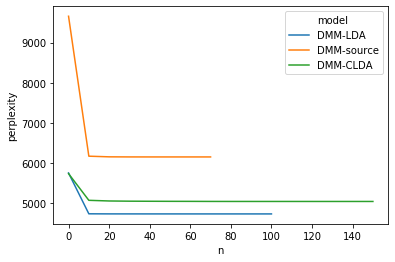

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
a = pd.DataFrame({'model':'DMM-LDA','perplexity':DMM_LDA.perplexity,'n':range(0,10*(len(DMM_LDA.perplexity)-1)+1,10) })
b = pd.DataFrame({'model':'DMM-source','perplexity':DMM_source.perplexity,'n':range(0,10*(len(DMM_source.perplexity)-1)+1,10)})
c = pd.DataFrame({'model':'DMM-CLDA','perplexity':DMM_CLDA.perplexity,'n':range(0,10*(len(DMM_CLDA.perplexity)-1)+1,10)})
perplexity = pd.concat([a,b,c], axis=0)
sns.lineplot(x='n',y='perplexity',hue='model',data=perplexity)
plt.savefig('/Users/shinbo/Desktop/metting/LDA/paper/experiments/car/fig/BC.png')
plt.show()

In [24]:
import pandas as pd
import numpy as np
from collections import Counter
def top_20_words_for_topics(CLDA_lam,CDMM, aux=None, n=50):
    if aux is True:
        K = len(CLDA_lam)-1
    else:
        K = len(CLDA_lam)
    words = {}
    unique_words = []
    for k in range(K):
        CLDA_lam_word = pd.DataFrame({'word':cv.get_feature_names(), 'lam':CDMM.components_[k,:] }).sort_values(by='lam', ascending=False)
        top_words = CLDA_lam_word.iloc[:n,:]['word'].tolist()
        words[k] = CLDA_lam_word.iloc[:n,:].set_index('word').to_dict()['lam']
        unique_words += top_words
        
    c = Counter(unique_words)
    words_all_appear = []
    for k,v in c.items():
        if v == K:
            words_all_appear.append(k)
    
    
    
    words_degree = []
    for k in range(K):
        for w,d in words[k].items():
            if w in words_all_appear:
                words_degree.append(d)
        
    return words_all_appear, len(set(unique_words)) / (K*n), len(set(unique_words)) , np.mean(words_degree)
words_, uq_words_ratio, uq_words_nums, asso_deg = top_20_words_for_topics(DMM_LDA_lam,DMM_LDA, n=50)
uq_words_ratio, uq_words_nums

(0.38, 95)

In [25]:
words_, uq_words_ratio, uq_words_nums, asso_deg = top_20_words_for_topics(DMM_CLDA_lam,DMM_CLDA, n=50)
uq_words_ratio, uq_words_nums

(0.46, 115)

In [56]:
words_, uq_words_ratio, uq_words_nums, asso_deg = top_20_words_for_topics(DMM_source_lam,DMM_source, n=50)
uq_words_ratio, uq_words_nums

(0.632, 158)

## n 변화시켜가며 비율 살펴보기

In [9]:
def varying_n(lam,mod):
    result = {}
    for n in range(10,51,10):
        words_, uq_words_ratio, uq_words_nums, asso_deg = top_20_words_for_topics(lam, mod, n=n)
        result[n] = (uq_words_ratio, uq_words_nums)
    return result

In [10]:
varying_n(DMM_LDA_lam,DMM_LDA)

{10: (0.575, 23),
 20: (0.4625, 37),
 30: (0.4166666666666667, 50),
 40: (0.4375, 70),
 50: (0.43, 86)}

In [11]:
varying_n(DMM_CLDA_lam,DMM_CLDA)

/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{10: (0.9, 36),
 20: (0.85, 68),
 30: (0.65, 78),
 40: (0.575, 92),
 50: (0.535, 107)}

In [31]:
varying_n(DMM_source_lam,DMM_source)

/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{10: (0.825, 33),
 20: (0.7625, 61),
 30: (0.75, 90),
 40: (0.74375, 119),
 50: (0.745, 149)}

In [32]:
DMM_source.perplexity

[15683.33882455813, 4862.665228800802, 4862.573836663506, 4862.573774702469]

## Glove 벡터 이용

In [12]:
n=0
glove_dir = '/Users/shinbo/Desktop/metting/LDA/paper/word_embedding/glove.6B/glove.6B.100d.txt'
word2glove = {}
with open(glove_dir, encoding="utf8") as f:

    for line in f:
        word_vector = line.split() # 각 줄을 읽어와서 word_vector에 저장.
        word = word_vector[0] # word_vector에서 첫번째 값만 저장
        word2glove[word] = np.array([float(i) for i in word_vector[1:]])

In [39]:
from scipy.spatial.distance import cosine
TOP_N_WORDS = 10
DMM_LDA_Top_words = TOP_N_WORDS_df(DMM_LDA, TOP_N_WORDS, [f'Topic {i}' for i in range(1,5)])
DMM_CLDA_Top_words = TOP_N_WORDS_df(DMM_CLDA, TOP_N_WORDS, ['interior/exterior','seat','engine','technology'] )
DMM_source_Top_words = TOP_N_WORDS_df(DMM_source, TOP_N_WORDS, ['interior/exterior','seat','engine','technology'] )     

In [22]:
from itertools import combinations
# 하나의 토픽 내에서 nC2
# 큰 값이 좋은 것임
def cosine_sim(df):
    total = 0
    for col in df.columns:
        cos_val = 0
        words = df[col].tolist()
        for c in combinations(words,2):
#             print(c)
            cos_val += 1-cosine(word2glove[c[0]], word2glove[c[1]])
#             print(c)
#             print(cosine(word2glove[c[0]], word2glove[c[1]]))
        print(col, cos_val)
        total += cos_val

cosine_sim(DMM_LDA_Top_words)
print()
cosine_sim(DMM_CLDA_Top_words)

Topic 1 18.30634151716085
Topic 2 20.692595438908235
Topic 3 22.837739656762945
Topic 4 21.904842424916218
20.935379759437062

price 24.96277772064167
service 15.167980320395671
food 19.916207420563286
accomodation 18.910066678221664
19.739258034955572


### word2vec 이용

In [40]:
import gensim

w2v_dir = '/Users/shinbo/Desktop/metting/LDA/paper/word_embedding/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin'
word2vec_model = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format(
    w2v_dir, binary=True
)

In [42]:
# 하나의 토픽 내에서 nC2
# 큰 값이 좋은 것임
from collections import Counter
from itertools import combinations
from scipy.spatial.distance import cosine
N=10
def cosine_sim_w2v(df,N):
    df = df.iloc[:N,:]
    total = 0
    for col in df.columns:
        cos_val = 0
        words = df[col].tolist()
        for c in combinations(words,2):
#             print(c)
            try:
                cos_val += 1-cosine(word2vec_model.get_vector(c[0]),
                               word2vec_model.get_vector(c[1]))
            except:
                pass
#             print(c)
#             print(cosine(word2glove[c[0]], word2glove[c[1]]))
#         print(col, cos_val)
        total += cos_val
    return total
result = cosine_sim_w2v(DMM_LDA_Top_words,N)
print(f'Mean: {result/4}')
print()
result = cosine_sim_w2v(DMM_CLDA_Top_words,N)
print(f'Mean: {result/4}')
print()
result = cosine_sim_w2v(DMM_source_Top_words,N)
print(f'Mean: {result/4}')

Mean: 8.560708199162036

Mean: 8.371545041212812

Mean: 8.979767326905858


### topic cross

In [43]:
from scipy.spatial.distance import cosine
TOP_N_WORDS = 100
DMM_LDA_Top_words = TOP_N_WORDS_df(DMM_LDA, TOP_N_WORDS, [f'Topic {i}' for i in range(1,5)])
DMM_CLDA_Top_words = TOP_N_WORDS_df(DMM_CLDA, TOP_N_WORDS, ['interior/exterior','seat','engine','technology'] )
DMM_source_Top_words = TOP_N_WORDS_df(DMM_source, TOP_N_WORDS, ['interior/exterior','seat','engine','technology'] )     

In [44]:
def topic_cross(df,N):
    df = df.iloc[:N,:]
    cols = list(df.columns)
    total = 0
    result = {}
    for col in cols:
        result[col] = {}
        rest_cols = list(set(cols) - set([col]))
        for word in df[col].tolist():
            # cosine sim within topic
            cos_val_intrinsic = 0
            for intra_word in list( set(df[col].tolist()) - set([word]) ):
                try:
                    cos_val_intrinsic += 1-cosine(word2vec_model.get_vector(word),
                           word2vec_model.get_vector(intra_word))
                except:
                    pass
            # cosin sim between topic
            max_cos_val_between = 1e-10
            for cross_col in rest_cols:
                cos_val_between = 0
                for cross_word in df[cross_col].tolist():
                    try:
                        cos_val_between += 1-cosine(word2vec_model.get_vector(word),
                               word2vec_model.get_vector(cross_word))
                    except:
                        pass
                if max_cos_val_between < cos_val_between:
                    max_cos_val_between = cos_val_between
            # compare within topic vs between topic
            if cos_val_intrinsic < max_cos_val_between:
                result[col][word] = 0
            else:
                result[col][word] = 1
    val = 0
    for topic in result.keys():
        for word in result[topic].keys():
            val += result[topic][word]
#         print(topic, f' :{val}')
    return val
        
# topic_cross(DMM_LDA_Top_words,N=50)
# print()
# topic_cross(DMM_CLDA_Top_words,N=50)
# print()
# topic_cross(DMM_source_Top_words,N=50)

In [45]:
result_LDA = pd.DataFrame()
for n in range(10,101,10):
    a = cosine_sim_w2v(DMM_LDA_Top_words,n)
    b = topic_cross(DMM_LDA_Top_words,n)
    row = [n,'DMM_LDA',a,b]
    result_LDA = pd.concat([result_LDA, pd.DataFrame(row).T])

result_CLDA = pd.DataFrame()
for n in range(10,101,10):
    a = cosine_sim_w2v(DMM_CLDA_Top_words,n)
    b = topic_cross(DMM_CLDA_Top_words,n)
    row = [n,'DMM_CLDA',a,b]
    result_CLDA = pd.concat([result_CLDA, pd.DataFrame(row).T])

result_source = pd.DataFrame()
for n in range(10,101,10):
    a = cosine_sim_w2v(DMM_source_Top_words,n)
    b = topic_cross(DMM_source_Top_words,n)
    row = [n,'DMM_source',a,b]
    result_source = pd.concat([result_source, pd.DataFrame(row).T])
    
result = pd.concat([result_LDA,result_CLDA,result_source])
result.columns = ['n','model','intrinsic','cross']

result['intrinsic'] = result['intrinsic'].astype(float)
result['cross'] = result['cross'].astype(float)

In [46]:
df_diff_1 = pd.DataFrame({'n':[i for i in range(10,101,10)]})
df_diff_1['intrinsic'] = list(result_CLDA.iloc[:,2] - result_LDA.iloc[:,2])
df_diff_1['model'] = 'CLDA-LDA'

df_diff_2 = pd.DataFrame({'n':[i for i in range(10,101,10)]})
df_diff_2['intrinsic'] = list(result_CLDA.iloc[:,2] - result_source.iloc[:,2])
df_diff_2['model'] = 'CLDA-source'

df_diff = pd.concat([df_diff_1,df_diff_2])

<function matplotlib.pyplot.show(*args, **kw)>

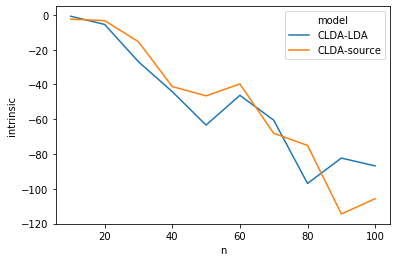

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x='n',y='intrinsic',hue='model',data=df_diff)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

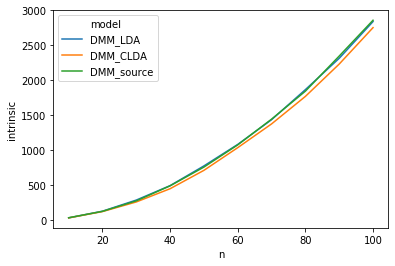

In [49]:
sns.lineplot(x='n',y='intrinsic',hue='model',data=result)
plt.show

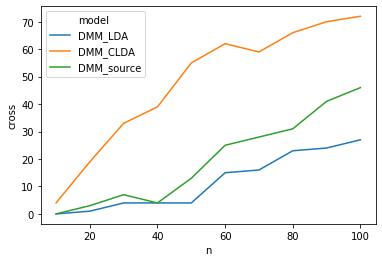

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x='n',y='cross',hue='model',data=result)
plt.savefig('/Users/shinbo/Desktop/metting/LDA/paper/experiments/car/fig/BC.png')
plt.show()

In [73]:
tick = pd.DataFrame()
tick['DMM_LDA'] = result[lambda x: x['model'] == 'DMM_LDA']['cross'].tolist()
tick['DMM_source'] = result[lambda x: x['model'] == 'DMM_source']['cross'].tolist()
tick['DMM_CLDA'] = result[lambda x: x['model'] == 'DMM_CLDA']['cross'].tolist()
tick['n'] = range(10,101,10)
tick

,DMM_LDA,DMM_source,DMM_CLDA,n
0,0.0,0.0,4.0,10
1,1.0,3.0,19.0,20
2,4.0,7.0,33.0,30
3,4.0,4.0,39.0,40
4,4.0,13.0,55.0,50
5,15.0,25.0,62.0,60
6,16.0,28.0,59.0,70
7,23.0,31.0,66.0,80
8,24.0,41.0,70.0,90
9,27.0,46.0,72.0,100


In [25]:
from scipy.spatial.distance import cosine
TOP_N_WORDS = 100
DMM_LDA_Top_words = TOP_N_WORDS_df(DMM_LDA, TOP_N_WORDS, [f'Topic {i}' for i in range(1,6)])
DMM_CLDA_Top_words = TOP_N_WORDS_df(DMM_CLDA, TOP_N_WORDS, ['seats','exterior/interior','engine','driving experience','technology'] )
DMM_source_Top_words = TOP_N_WORDS_df(DMM_source, TOP_N_WORDS, ['seats','exterior/interior','engine','driving experience','technology'])     

In [26]:
from collections import Counter
words = []
for review in data:
    words += review
words_counter = Counter(words)

from collections import Counter
words = []
for review in data:
    words += review
words_counter = Counter(words)

black
(100, 4) LDA
(100, 4) LDA
(100, 4) LDA
(100, 4) LDA
(100, 4) LDA
red
(100, 4) SLDA
(100, 4) SLDA
(100, 4) SLDA


No handles with labels found to put in legend.


(100, 4) SLDA
(100, 4) SLDA
blue
(100, 4) CLDA
(100, 4) CLDA
(100, 4) CLDA
(100, 4) CLDA
(100, 4) CLDA


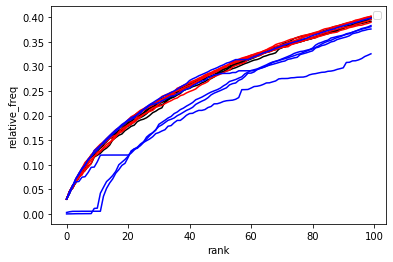

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
result = pd.DataFrame()
for column in DMM_LDA_Top_words.columns:
    temp = pd.DataFrame()
    words_ = DMM_LDA_Top_words[column].tolist()
    freq = []
    for word in words_:
        freq.append( words_counter[word] / len(words) )
    temp['relative_freq'] = np.cumsum(freq)
    temp['rank'] = [i for i in range(100)]
    temp['topics'] = column
    
    result = pd.concat([result,temp], axis=0)
    
# sns.lineplot(x='rank',y='relative_freq',hue='topics',data=result)
# plt.show

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# result = pd.DataFrame()
for column in DMM_source_Top_words.columns:
    temp = pd.DataFrame()
    words_ = DMM_source_Top_words[column].tolist()
    freq = []
    for word in words_:
        freq.append( words_counter[word] / len(words) )
    temp['relative_freq'] = np.cumsum(freq)
    temp['rank'] = [i for i in range(100)]
    temp['topics'] = column
    
    result = pd.concat([result,temp], axis=0)
    
# sns.lineplot(x='rank',y='relative_freq',hue='topics',data=result)
# plt.show

import matplotlib.pyplot as plt
import seaborn as sns
# result = pd.DataFrame()
for column in DMM_CLDA_Top_words.columns:
    temp = pd.DataFrame()
    words_ = DMM_CLDA_Top_words[column].tolist()
    freq = []
    for word in words_:
        freq.append( words_counter[word] / len(words) )
    temp['relative_freq'] = np.cumsum(freq)
    temp['rank'] = [i for i in range(100)]
    temp['topics'] = column
    
    result = pd.concat([result,temp], axis=0)
    
# sns.lineplot(x='rank',y='relative_freq',hue='topics',data=result)
# plt.show
result['model'] = ['LDA']*500 + ['SLDA']*500 + ['CLDA']*500

model2topics = {
    'LDA':['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5'],
    'SLDA':['seats','exterior/interior','engine','driving experience','technology'],
    'CLDA':['seats','exterior/interior','engine','driving experience','technology'],
}
colors = {
    'LDA':'black',
    'SLDA':'red',
    'CLDA':'blue',
}

for model in model2topics.keys():
    color = colors[model]
    print(color)
    for topic in model2topics[model]:
        temp = result[lambda x: (x['model'] == model) & (x['topics'] == topic)]
        print(temp.shape,model)
        sns.lineplot(x='rank',y='relative_freq',data=temp, color=color)
plt.legend()

In [29]:
result[lambda x: x['model'] == 'CLDA']

,relative_freq,rank,topics,model
0,0.000286,0,seats,CLDA
1,0.000370,1,seats,CLDA
2,0.000488,2,seats,CLDA
3,0.000664,3,seats,CLDA
4,0.000739,4,seats,CLDA
...,...,...,...,...
95,0.374181,95,technology,CLDA
96,0.376936,96,technology,CLDA
97,0.378360,97,technology,CLDA
98,0.380177,98,technology,CLDA
